In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')


In [2]:
duration = 10
frequency = 80
length = frequency * duration
measurement_frequency = 20
measurement_period = frequency / measurement_frequency

time = [t / frequency for t in range(length)]

real_sigma = 0.0
real_noise = np.random.normal(0.0, 0.0, length)

measurement_sigma = 10
increment_sigma = 1

measurement_noise = np.random.normal(0.0, measurement_sigma, length)
increment_noise = np.random.normal(0.0, increment_sigma, length)

real = [36 * np.sin(t * 8 * np.pi / length) + real_noise[t] for t in range(length)]
measurement = [real[t] + measurement_noise[t] for t in range(length)]

increment = [0 if t == 0 else real[t] - real[t - 1] + increment_noise[t] for t in range(length)]

gain_factor = 1

naive_integration_memo = [real[0]]
def naive_integration(t):
    if t < len(naive_integration_memo): return naive_integration_memo[t]
    n = naive_integration(t - 1) + increment[t]
    naive_integration_memo.append(n)
    return n

kalman_predict_memo = [(real[0],0)]
def kalman_predict(t):
    if t < len(kalman_predict_memo): return kalman_predict_memo[t]
    prev = kalman_update(t - 1)
    n = (prev[0] + increment[t], prev[1] + increment_sigma ** 2)
    kalman_predict_memo.append(n)
    return n

kalman_gain_memo = [0]
def kalman_gain(t):
    if t < len(kalman_gain_memo): return kalman_gain_memo[t]
    prev = kalman_predict(t)
    if t % measurement_period == 0:
         n = prev[1] / (prev[1] + measurement_sigma ** 2) * gain_factor
#         n = 1
    else:
        n = 0
    kalman_gain_memo.append(n)
    return n

kalman_update_memo = [(real[0],0)]
def kalman_update(t):
    if t < len(kalman_update_memo): return kalman_update_memo[t]
    prev = kalman_predict(t)
    meas = measurement[t]
    gain = kalman_gain(t)
    n = (prev[0] + gain * (meas - prev[0]), prev[1] * (1 - gain))
    kalman_update_memo.append(n)
    return n
    
    
def kalman_run():
    for t in range(length):
        kalman_update(t)

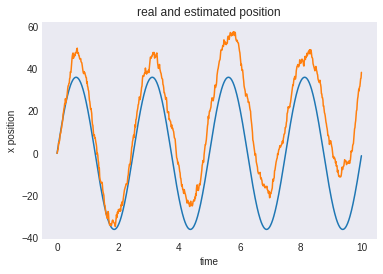

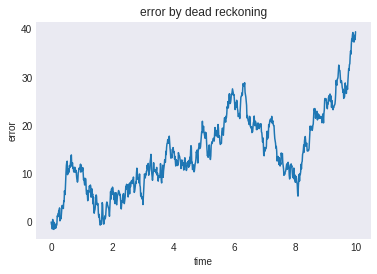

In [3]:
t, naive = list(zip(*[(t, naive_integration(t)) for t in range(length)]))
naive_error = [m - r for m, r in zip(naive, real)]

plt.xlabel("time")
plt.ylabel("x position")
plt.title("real and estimated position")
plt.plot(time, real)
plt.plot(time, naive)
plt.show()

plt.xlabel("time")
plt.ylabel("error")
plt.title("error by dead reckoning")
plt.plot(time, naive_error)
plt.show()

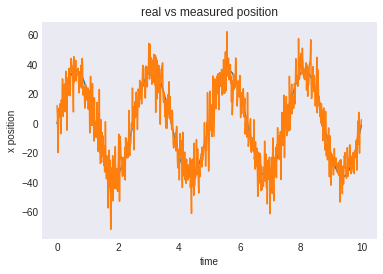

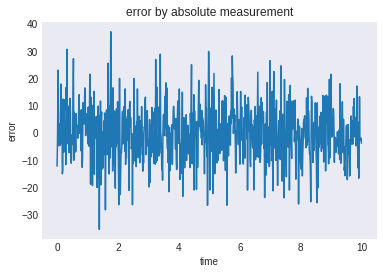

In [4]:
plt.xlabel("time")
plt.ylabel("x position")
plt.title("real vs measured position")
plt.plot(time, real)
plt.plot(time, measurement)
plt.show()

plt.xlabel("time")
plt.ylabel("error")
plt.title("error by absolute measurement")
plt.plot(time, -measurement_noise)
plt.show()

-8.423777892102311


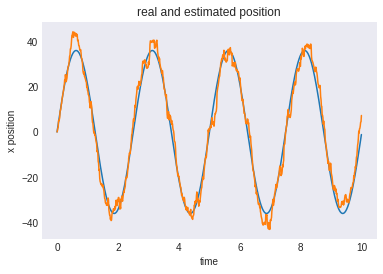

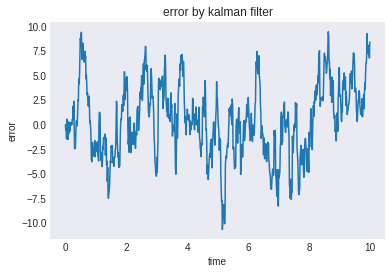

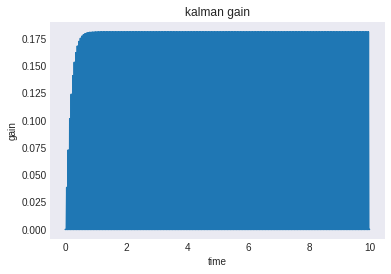

In [5]:
kalman_run()

kalman_final = kalman_update_memo[-1]
real_final = real[length - 1]
kalman_error_final = real_final - kalman_final[0]
print(kalman_error_final)

kalman_guess = list(zip(*kalman_update_memo))[0]
kalman_error = [m - r for m, r in zip(kalman_guess, real)]

plt.xlabel("time")
plt.ylabel("x position")
plt.title("real and estimated position")
plt.plot(time, real)
plt.plot(time, kalman_guess)
plt.show()

plt.xlabel("time")
plt.ylabel("error")
plt.title("error by kalman filter")
plt.plot(time, kalman_error)
plt.show()

plt.xlabel("time")
plt.ylabel("gain")
plt.title("kalman gain")
plt.plot(time, kalman_gain_memo)
plt.show()

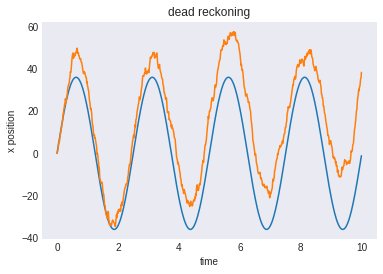

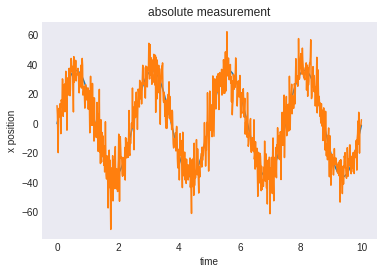

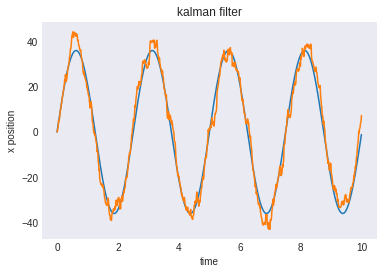

In [8]:
plt.xlabel("time")
plt.ylabel("x position")
plt.title("dead reckoning")
plt.plot(time, real)
plt.plot(time, naive)
plt.show()

plt.xlabel("time")
plt.ylabel("x position")
plt.title("absolute measurement")
plt.plot(time, real)
plt.plot(time, measurement)
plt.show()


plt.xlabel("time")
plt.ylabel("x position")
plt.title("kalman filter")
plt.plot(time, real)
plt.plot(time, kalman_guess)
plt.show()